In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from IPython.display import Image, display
from IPython.core.display import HTML
%matplotlib inline

In [2]:
data_dir = "../landmark_data/"
data_in = "train.csv"
df = pd.read_csv(os.path.join(data_dir, data_in))

df.head()

,id,url,landmark_id
0,cacf8152e2d2ae60,http://static.panoramio.com/photos/original/70...,4676
1,0a58358a2afd3e4e,http://lh6.ggpht.com/-igpT6wu0mIA/ROV8HnUuABI/...,6651
2,6b2bb500b6a38aa0,http://lh6.ggpht.com/-vKr5G5MEusk/SR6r6SJi6mI/...,11284
3,b399f09dee9c3c67,https://lh3.googleusercontent.com/-LOW2cjAqubA...,8429
4,19ace29d77a5be66,https://lh5.googleusercontent.com/-tnmSXwQcWL8...,6231


### No missing data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1225029 entries, 0 to 1225028
Data columns (total 3 columns):
id             1225029 non-null object
url            1225029 non-null object
landmark_id    1225029 non-null int64
dtypes: int64(1), object(2)
memory usage: 28.0+ MB


### Check for duplicates 
(No Duplicate IDs)

In [4]:
assert(len(set(df.id)) == df.shape[0])

### Distribution of landmark ID's

In [5]:
n_landmarks = df.landmark_id.nunique()
"Number of unique landmarks: {}".format(n_landmarks)

'Number of unique landmarks: 14951'

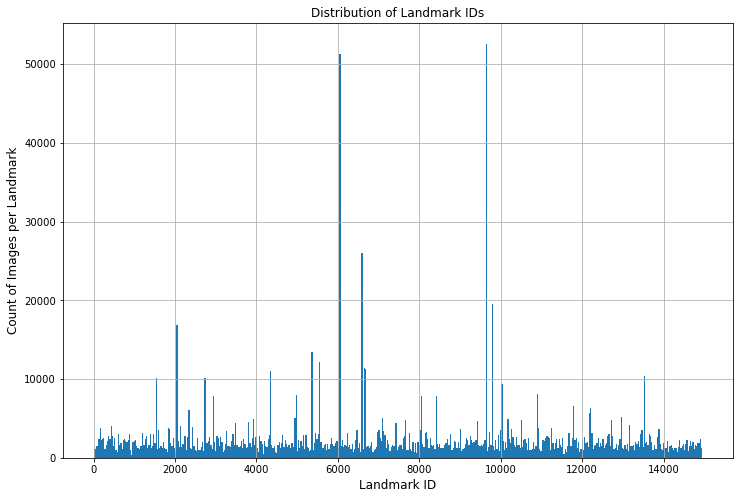

In [6]:
df.landmark_id.hist(bins=500, figsize=(12,8))
plt.xlabel("Landmark ID", fontsize="large")
plt.ylabel("Count of Images per Landmark", fontsize="large")
plt.title("Distribution of Landmark IDs", fontsize="large");
plt.savefig("images/landmark_dist")

### Above we can see, there are a small number of landmarks containing the majority of the images.
- Below we investigate the most/least frequent landmark IDs

In [7]:
top10 = df.landmark_id.value_counts()[:10]
print("Top 10 most frequent Landmark counts:\n", top10)
print("\nBottom 10 least frequent Landmark counts:\n", df.landmark_id.value_counts()[-10:])

Top 10 most frequent Landmark counts:
 9633    50337
6051    50148
6599    23415
9779    18471
2061    13271
5554    11147
6651     9508
6696     9222
5376     9216
2743     8997
Name: landmark_id, dtype: int64

Bottom 10 least frequent Landmark counts:
 10007    1
2683     1
4753     1
6261     1
4144     1
1527     1
6025     1
4334     1
5865     1
8381     1
Name: landmark_id, dtype: int64


In [8]:
"Average number of training images per Landmark: ≈ {:.1f}".format(np.mean(df.landmark_id.value_counts()))

'Average number of training images per Landmark: ≈ 81.9'

In [9]:
"Median of training images per Landmark: ≈ {:.1f}".format(np.median(df.landmark_id.value_counts()))

'Median of training images per Landmark: ≈ 14.0'

In [10]:
n_less10 = pd.DataFrame(df.landmark_id.value_counts()).query("landmark_id <=10").shape[0]
"{:.2f}% of Landmarks have less than 10 training images.".format(n_less10/n_landmarks * 100)

'43.87% of Landmarks have less than 10 training images.'

In [11]:
total, top100 = df.shape[0], df.landmark_id.value_counts()[:100].sum()
"While the Top 20 most frequent landmark ID's contain {:.2f}% of the training images".format(top100/total *100)

"While the Top 20 most frequent landmark ID's contain 33.31% of the training images"

### Above it becomes much clearer the skewed distribution of Landmarks 
- Of the 14,951 unique Landmarks, one-third of the images fall into the top 100 most frequent Landmarks.
- Additionally, 6,559 of the Landmarks have at most 10 images. 
- This significant class imbalance will have to be taken into consideration when training models. 

In [12]:
def landmark_imgs(landmark, n_imgs=10, df=df):
    """
    takes in an integer `landmark` associated with a landmark class
    creates a list of urls of length `n_imgs`, default 10
    from a dataframe column labeled `landmark_id`, default `df`
    returns associated images
    """
    urls = df[df.landmark_id == landmark].head(n_imgs).url.tolist()
    style = "height: 120px; margin: 2px; float: left; border: 1px solid black;"
    img_lst = ''.join(["<img style='{}' src='{}' />".format(style, img) for img in urls])
    display(HTML(img_lst))

In [13]:
print("Top 10 Landmarks:\n")
for l_id in top10.keys().tolist():
    print("Landmark ID {}:".format(l_id))
    landmark_imgs(l_id)
    print("-"*90 + "\n")

Top 10 Landmarks:

Landmark ID 9633:


------------------------------------------------------------------------------------------

Landmark ID 6051:


------------------------------------------------------------------------------------------

Landmark ID 6599:


------------------------------------------------------------------------------------------

Landmark ID 9779:


------------------------------------------------------------------------------------------

Landmark ID 2061:


------------------------------------------------------------------------------------------

Landmark ID 5554:


------------------------------------------------------------------------------------------

Landmark ID 6651:


------------------------------------------------------------------------------------------

Landmark ID 6696:


------------------------------------------------------------------------------------------

Landmark ID 5376:


------------------------------------------------------------------------------------------

Landmark ID 2743:


------------------------------------------------------------------------------------------



### Familiar with quite a few of the places, however something else stands out: 
### The 7th image of Landmark ID 5376 is MISSING

In [14]:
Image(url=df[df.landmark_id == 5376].iloc[6].url)

___